# Análise de Vendas - Supermercado

## Introdução

Este projeto tem como objetivo realizar uma análise exploratória e fornecer insights estratégicos para uma empresa fictícia, com base em um dataset contendo informações sobre pedidos, clientes, produtos e transações. A análise será conduzida utilizando ferramentas de análise de dados em Python, dentro de um ambiente de Jupyter Notebook, com o propósito de compreender melhor o perfil dos clientes, avaliar o desempenho das vendas e analisar a eficácia das formas de entrega e pagamento. Essa análise faz parte de um desafio do Green Team da UFABC <3

A partir dos dados disponibilizados, os seguintes aspectos serão abordados:

1. **Compreensão do perfil dos clientes**: Identificação dos segmentos mais recorrentes e análise dos produtos mais comprados por cada grupo de clientes.
2. **Avaliação do desempenho das vendas**: Determinação dos produtos mais lucrativos e análise das variações de lucro por região e forma de pagamento.
3. **Análise da eficácia das entregas e pagamentos**: Investigação de como as formas de entrega e métodos de pagamento impactam o lucro e as devoluções.

Com base nessa análise, será possível gerar insights valiosos que poderão ajudar a empresa a tomar decisões mais informadas, melhorando tanto a experiência do cliente quanto o seu desempenho operacional.

### Metodologia

1. **Exploração e limpeza dos dados**: Primeira etapa focada em preparar os dados para análise, tratando valores ausentes e formatando adequadamente as variáveis.
2. **Análise exploratória dos dados (EDA)**: Geração de tabelas e gráficos que permitam observar padrões e comportamentos nos dados.
3. **Geração de insights**: Identificação de correlações e tendências que possam guiar as recomendações para a empresa.

### Ferramentas Utilizadas

- **Python (Pandas, NumPy)**: Para manipulação e análise dos dados.
- **Matplotlib e Seaborn**: Para criação de gráficos e visualizações.
- **Jupyter Notebook**: Como ambiente de desenvolvimento e execução do código.

A análise será detalhada em cada seção, acompanhada de gráficos e explicações para facilitar a compreensão dos resultados e apoiar a empresa na tomada de decisões estratégicas.



#### --> Importação de bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


#### --> Carregamento dos dados

In [5]:
# Uso a biblioteca pandas para fazer a leitura do dataset csv e guardo na variável df
df = pd.read_csv('C:/Users/Gabriel/Documents/Desafio_Green_Team/data/data_raw/vendas_supermercado.csv')

### 1. Entendimento do Dataset

In [6]:
# Conhecendo o dataset

# Aqui, chamo as primeiras linhas do dataset
df.head()

,Unnamed: 0,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,...,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1.0,28.2668,No,Online
1,1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3.0,38.2668,No,Online
2,2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2.0,67.2742,No,Cards
3,3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2.0,28.6150,No,Online
4,4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2.0,-5.2640,No,Online


In [7]:
# Peço algumas informações sobre os dados
df.info()

# Verificamos as dimensões de nossos dados
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5901 non-null   int64  
 1   CODIGO_PEDIDO          5901 non-null   object 
 2   DATA_PEDIDO            5901 non-null   object 
 3   DATA_ENTREGA           5801 non-null   object 
 4   FORMA_ENTREGA          5801 non-null   object 
 5   CODIGO_CLIENTE         5801 non-null   object 
 6   NOME_CLIENTE           5801 non-null   object 
 7   SEGMENTO_CLIENTE       5801 non-null   object 
 8   PAIS                   5801 non-null   object 
 9   CIDADE                 5801 non-null   object 
 10  ESTADO                 5801 non-null   object 
 11  REGIAO                 5801 non-null   object 
 12  CODIGO_PRODUTO         5801 non-null   object 
 13  CATEGORIA_PRODUTO      5801 non-null   object 
 14  SUB_CATEGORIA_PRODUTO  5801 non-null   object 
 15  NOME

(5901, 21)

In [8]:
# Verificando valores nulos

df.isnull().sum()

Unnamed: 0                 0
CODIGO_PEDIDO              0
DATA_PEDIDO                0
DATA_ENTREGA             100
FORMA_ENTREGA            100
CODIGO_CLIENTE           100
NOME_CLIENTE             100
SEGMENTO_CLIENTE         100
PAIS                     100
CIDADE                   100
ESTADO                   100
REGIAO                   100
CODIGO_PRODUTO           100
CATEGORIA_PRODUTO        100
SUB_CATEGORIA_PRODUTO    100
NOME_PRODUTO             100
VALOR_PRODUTO            100
QUANTIDADE               100
LUCRO                    100
DEVOLUCAO                100
MODO_PAGAMENTO           100
dtype: int64

### 1.1 Alguns problemas identificados

### Problemas identificados:

1. **Valores ausentes**:
   - As colunas `DATA_ENTREGA`, `FORMA_ENTREGA`, `CODIGO_CLIENTE`, `NOME_CLIENTE`, `SEGMENTO_CLIENTE`, `PAIS`, `CIDADE`, `ESTADO`, `REGIAO`, `CODIGO_PRODUTO`, `CATEGORIA_PRODUTO`, `SUB_CATEGORIA_PRODUTO`, `NOME_PRODUTO`, `VALOR_PRODUTO`, `QUANTIDADE`, `LUCRO`, `DEVOLUCAO`, e `MODO_PAGAMENTO` têm 100 registros ausentes (tem 5901 entradas, mas apenas 5801 não nulos). Isso pode impactar a análise e será necessário tratar.

2. **Tipos de dados inadequados**:
   - As colunas `DATA_PEDIDO` e `DATA_ENTREGA` estão com o tipo `object`, mas deveriam estar no formato de data (`datetime`) para permitir cálculos relacionados a prazos de entrega e análise temporal.
   - A coluna `DEVOLUCAO` está como `object` (texto) mas poderia ser convertida em um tipo booleano (`True/False`), já que é uma variável categórica indicando devolução.

3. **Coluna desnecessária (Unnamed: 0):**

   - A coluna Unnamed: 0 parece ser um índice duplicado e pode ser removida para evitar redundância.

In [9]:
# Primeiro, eliminando a coluna desnecessária

df.drop(columns=['Unnamed: 0'])

,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,ESTADO,REGIAO,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO
0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1.0,28.2668,No,Online
1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3.0,38.2668,No,Online
2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2.0,67.2742,No,Cards
3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2.0,28.6150,No,Online
4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2.0,-5.2640,No,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4.0,12.1176,No,COD
5897,CA-2020-115427,2020-12-30,2021-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2.0,4.5188,Yes,Online
5898,CA-2020-156720,2020-12-30,2021-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3.0,-0.6048,No,Online
5899,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3.0,19.7910,No,COD


Agora, por boas práticas, pensando em futuras análises, será convertido alguns tipos de dados. 

- As datas serão convertidas para datetime;

- A coluna 'Devolução', que será convertida para booleano;

In [10]:
# Conversão da coluna DATA_PEDIDO
df['DATA_PEDIDO'] = pd.to_datetime(df['DATA_PEDIDO'])

#Conversão da coluna DATA_ENTREGA
df['DATA_ENTREGA'] = pd.to_datetime(df['DATA_ENTREGA'])

# Conversão da coluna DEVOLUÇÃO
df['DEVOLUCAO'] = df['DEVOLUCAO'].apply(lambda x: True if x == 'Yes' else False) 

#### 1.2 Abordagem para Valores Nulos 

Inicialmente, minha estratégia era substituir os valores ausentes por modas, médias e/ou medianas (dependendo da presença de outliers). No entanto, ao analisar mais profundamente o dataset, percebi que os dados faltantes estavam em linhas completamente vazias. Essas linhas representam cerca de 100 registros, o que corresponde a aproximadamente 1,7% do total de dados, uma proporção que não tem um impacto significativo no conjunto geral.

Dado que esses dados ausentes não são numerosos e representam uma porção muito pequena do dataset, decidi **excluir as linhas com dados faltantes** em vez de preenchê-las. Isso permitirá que eu trabalhe apenas com dados completos e confiáveis, evitando distorções que poderiam surgir ao preencher informações ausentes sem justificativa clara.

Até o momento, estava utilizando códigos como para o segmento de clientes:

```python
df['SEGMENTO_CLIENTE'].fillna(df['SEGMENTO_CLIENTE'].mode()[0], inplace=True)
df['CODIGO_CLIENTE'].fillna('Desconhecido', inplace=True)
df['NOME_CLIENTE'].fillna('Desconhecido', inplace=True)
df['CATEGORIA_PRODUTO'].fillna(df['CATEGORIA_PRODUTO'].mode()[0], inplace=True)
df['SUB_CATEGORIA_PRODUTO'].fillna(df['SUB_CATEGORIA_PRODUTO'].mode()[0], inplace=True)

Contudo, após uma reavaliação da situação, optei por alterar a metodologia e proceder com a exclusão dessas linhas incompletas.


In [11]:
# Excluindo as linhas que possuem valores ausentes
df.dropna(inplace=True)

# Verificando o shape do dataframe após a exclusão
print(f"Número de linhas e colunas após exclusão de linhas com dados ausentes: {df.shape}")


Número de linhas e colunas após exclusão de linhas com dados ausentes: (5801, 21)


### **Identificando outliers**



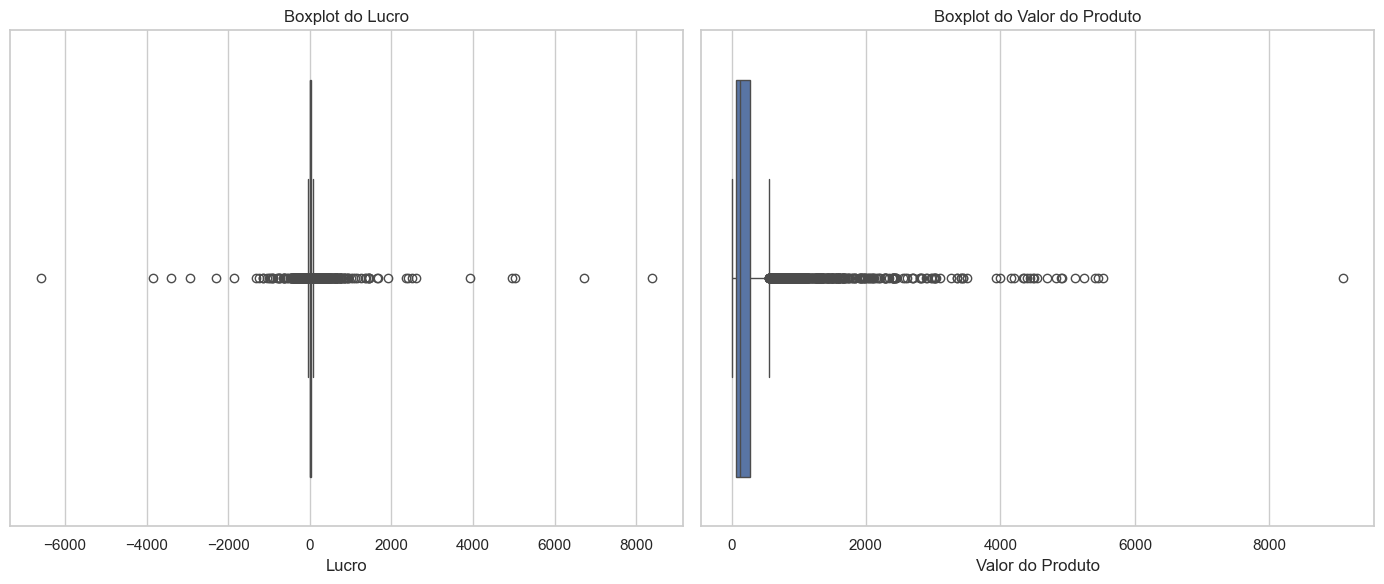

In [12]:
# Para verificar possíveis outliers e determinar como substituiremos o VALOR_PRODUTO e LUCRO

# Determinei um estilo de gráfico
sns.set(style="whitegrid")

# Criando uma figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot para o LUCRO
sns.boxplot(ax=axes[0], x=df['LUCRO'])
axes[0].set_title('Boxplot do Lucro')
axes[0].set_xlabel('Lucro')

# Boxplot para o VALOR_PRODUTO
sns.boxplot(ax=axes[1], x=df['VALOR_PRODUTO'])
axes[1].set_title('Boxplot do Valor do Produto')
axes[1].set_xlabel('Valor do Produto')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

### **Analisando a Variedade de Produtos no Supermercado: Lucro e Valor**

A análise dos **boxplots** dos dados de **Lucro** e **Valor do Produto** revela informações importantes sobre a distribuição e variação de uma ampla gama de produtos no supermercado. Sabemos que, em um ambiente varejista, a variedade de itens é vasta, indo desde produtos de baixo custo, como itens básicos do dia a dia, até produtos de maior valor agregado.

#### 1. **Lucro**:
   - O boxplot do lucro mostra que a maioria dos produtos apresenta **valores concentrados próximos de zero**, indicando que, embora o lucro geral seja modesto, há transações que produzem tanto pequenos lucros quanto pequenos prejuízos.
   - **Outliers** nos lucros, tanto positivos quanto negativos, representam produtos ou situações específicas, como promoções ou descontos agressivos, que geram prejuízos pontuais, ou itens de alta margem que resultam em lucros elevados. Alguns exemplos podem incluir promoções especiais ou produtos de nicho com alta demanda e preços premium.
   - A pequena variação no lucro ao redor da mediana sugere que, em um supermercado, a maioria dos itens gera lucros modestos, o que é esperado devido às margens baixas no setor de varejo.

#### 2. **Valor do Produto**:
   - O boxplot do valor dos produtos demonstra que a maioria das vendas envolve produtos de **baixo valor**, o que é típico em supermercados, onde itens essenciais e de consumo frequente, como alimentos básicos, dominam as vendas.
   - Contudo, há uma cauda longa que se estende até **produtos de maior valor**, como eletrônicos ou itens importados, que aparecem como **outliers** no gráfico. Isso evidencia a diversidade de produtos vendidos, desde os mais acessíveis até os mais caros, mas estes últimos compõem uma pequena fração do total de vendas.

### **Modelagem dos Dados**:
Dada a presença de possíveis outliers e uma variedade de produtos com **números contrastantes**, é fundamental **modelar os dados de forma mais simplificada e acessível para análise**. Isso pode envolver:
- **Tratamento dos outliers**, removendo-os ou analisando-os separadamente.
- Aplicar técnicas como **normalização ou padronização** dos dados para lidar com a diversidade de valores.

Com esses ajustes, podemos obter uma análise mais clara e objetiva, auxiliando na **tomada de decisões** sobre o portfólio de produtos e estratégias de precificação dentro do supermercado.

In [13]:
# Primeiro, inicializaremos uma nova coluna chamada 'MARGEM_LUCRO'

df['MARGEM_LUCRO'] = (df['LUCRO'] / (df['VALOR_PRODUTO'] * df['QUANTIDADE'])) * 100

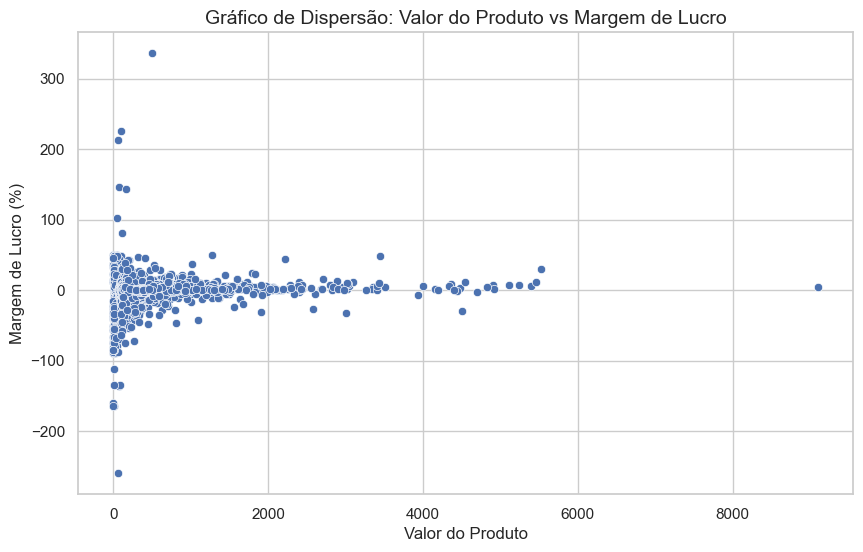

In [14]:
# Agora, será feito um gráfico de dispersão para identificar valores muito fora da distribuição padrão. Os dados considerados 'outliers' serão analisados a parte.

sns.set(style='whitegrid')

# Criando o gráfico de dispersão
plt.figure(figsize=(10,6))
sns.scatterplot(x='VALOR_PRODUTO', y='MARGEM_LUCRO', data=df)

# Adicionando título e rótulos aos eixos
plt.title('Gráfico de Dispersão: Valor do Produto vs Margem de Lucro', fontsize=14)
plt.xlabel('Valor do Produto', fontsize=12)
plt.ylabel('Margem de Lucro (%)', fontsize=12)

# Mostrando o gráfico
plt.show()


In [35]:
# Aqui, será calculada a média e o desvio padrão do lucro total
media_margem_lucro = df['MARGEM_LUCRO'].mean()
desvio_padrao_lucro = df['MARGEM_LUCRO'].std()

# Identificar os possíveis outliers - 3 desvios padrão
limite_inferior = media_margem_lucro - (3 * desvio_padrao_lucro)
limite_superior = media_margem_lucro + (3 * desvio_padrao_lucro)

# Filtrar os dados problemáticos (outliers)
df_outliers = df[(df['MARGEM_LUCRO'] < limite_inferior) | (df['MARGEM_LUCRO'] > limite_superior)]

# Criar df_clean sem os dados problemáticos
df_clean = df[(df['MARGEM_LUCRO'] >= limite_inferior) & (df['MARGEM_LUCRO'] <= limite_superior)]

# Exibir o resultado
print("Número de outliers:", len(df_outliers))
print("Número de registros limpos:", len(df_clean))

# Salvar os DataFrames resultantes
df_clean.to_csv('../data/data_cleaned/df_clean.csv', index=False)
df_outliers.to_csv('../data/data_cleaned/df_outliers.csv', index=False)

df_clean.drop(columns=['Unnamed: 0'])

Número de outliers: 73
Número de registros limpos: 5728


,CODIGO_PEDIDO,DATA_PEDIDO,DATA_ENTREGA,FORMA_ENTREGA,CODIGO_CLIENTE,NOME_CLIENTE,SEGMENTO_CLIENTE,PAIS,CIDADE,ESTADO,...,CODIGO_PRODUTO,CATEGORIA_PRODUTO,SUB_CATEGORIA_PRODUTO,NOME_PRODUTO,VALOR_PRODUTO,QUANTIDADE,LUCRO,DEVOLUCAO,MODO_PAGAMENTO,MARGEM_LUCRO
0,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,...,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1.0,28.2668,False,Online,38.229375
1,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,...,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3.0,38.2668,False,Online,7.333333
2,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,...,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2.0,67.2742,False,Cards,14.500000
3,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,...,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2.0,28.6150,False,Online,12.500000
4,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,...,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2.0,-5.2640,False,Online,-8.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4.0,12.1176,False,COD,1.421346
5897,CA-2020-115427,2020-12-30,2021-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2.0,4.5188,True,Online,0.763558
5898,CA-2020-156720,2020-12-30,2021-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3.0,-0.6048,False,Online,-0.051956
5899,CA-2020-143259,2020-12-30,2021-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3.0,19.7910,False,COD,1.425528


Verificação gráfica:

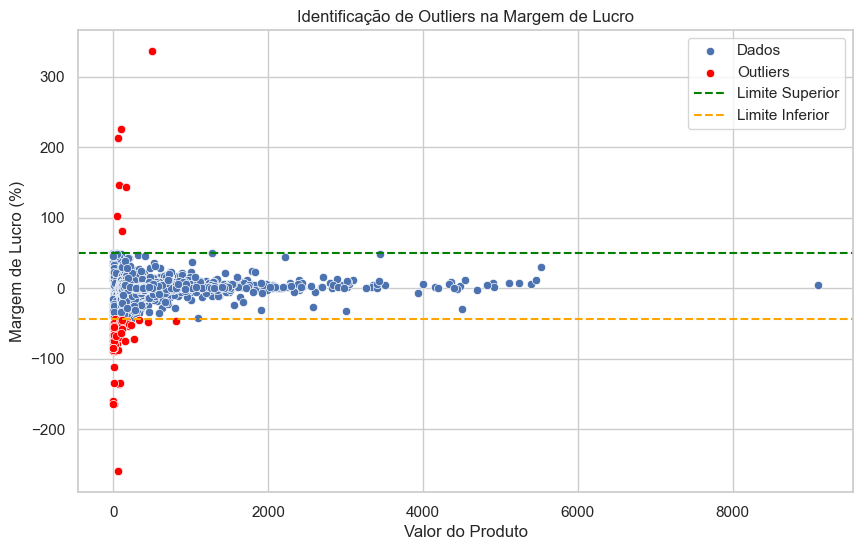

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VALOR_PRODUTO', y='MARGEM_LUCRO', data=df, label='Dados')
sns.scatterplot(x='VALOR_PRODUTO', y='MARGEM_LUCRO', data=df_outliers, color='red', label='Outliers')
plt.axhline(y=limite_superior, color='green', linestyle='--', label='Limite Superior')
plt.axhline(y=limite_inferior, color='orange', linestyle='--', label='Limite Inferior')
plt.xlabel('Valor do Produto')
plt.ylabel('Margem de Lucro (%)')
plt.title('Identificação de Outliers na Margem de Lucro')
plt.legend()
plt.show()

### **Análise Explorátoria dos Dados e Respondendo Perguntas de Negócios**


### 1. Compreender o perfil dos clientes

Pergunta: Quais são os segmentos de clientes mais frequentes (Corporate, Consumer) e quais produtos eles compram mais?

In [17]:
# Contar a frequência de segmentos de clientes do dataset geral

segmento_count = df['SEGMENTO_CLIENTE'].value_counts()
print(segmento_count)

# Contar a frequência de segmentos de clientes do dataset limpo

segmento_count_clean = df_clean['SEGMENTO_CLIENTE'].value_counts()
print(segmento_count_clean)

SEGMENTO_CLIENTE
Consumer       2948
Corporate      1745
Home Office    1108
Name: count, dtype: int64
SEGMENTO_CLIENTE
Consumer       2914
Corporate      1722
Home Office    1092
Name: count, dtype: int64


In [18]:
# Agrupando por SEGMENTO_CLIENTE e CATEGORIA_PRODUTO, contando vendas (DF_CLEAN)

produtos_por_segmento_clean = df_clean.groupby(['SEGMENTO_CLIENTE', 'CATEGORIA_PRODUTO']).size().reset_index(name='Quantidade')
produtos_por_segmento_clean = produtos_por_segmento_clean.sort_values(['SEGMENTO_CLIENTE', 'Quantidade'], ascending=[True, False])
print(produtos_por_segmento_clean)


  SEGMENTO_CLIENTE CATEGORIA_PRODUTO  Quantidade
1         Consumer   Office Supplies        1777
0         Consumer         Furniture         630
2         Consumer        Technology         507
4        Corporate   Office Supplies        1025
3        Corporate         Furniture         378
5        Corporate        Technology         319
7      Home Office   Office Supplies         658
8      Home Office        Technology         221
6      Home Office         Furniture         213


### 2. Avaliar o desempenho das vendas

Pergunta: Quais categorias de produtos são mais lucrativos? Há alguma variação de lucro por região ou por modo de pagamento?

In [19]:
# Calcular lucro médio por categoria

lucro_categoria = df_clean.groupby('CATEGORIA_PRODUTO')['LUCRO'].mean().reset_index()
lucro_categoria = lucro_categoria.sort_values(by='LUCRO', ascending=False)
print(lucro_categoria)


  CATEGORIA_PRODUTO      LUCRO
2        Technology  72.983645
1   Office Supplies  21.357427
0         Furniture   9.484636


In [20]:
# Calcular lucro médio por região (dataset bruto)
lucro_regiao_bruto = df.groupby('REGIAO')['LUCRO'].mean().reset_index()
lucro_regiao_bruto = lucro_regiao_bruto.sort_values(by='LUCRO', ascending=False)
print("Lucro Região Bruto: \n \n", lucro_regiao_bruto, "\n")

# Calcular lucro médio por região (dataset limpo)
lucro_regiao = df_clean.groupby('REGIAO')['LUCRO'].mean().reset_index()
lucro_regiao = lucro_regiao.sort_values(by='LUCRO', ascending=False)
print("Lucro Região Limpo: \n \n", lucro_regiao)


Lucro Região Bruto: 
 
     REGIAO      LUCRO
3     West  35.407926
1     East  31.329974
2    South  24.709670
0  Central  18.370100 

Lucro Região Limpo: 
 
     REGIAO      LUCRO
3     West  36.270856
1     East  30.974464
2    South  24.453039
0  Central  16.130780


Quais subcategorias de produtos mais vendidos?

In [21]:
# Contagem de vendas por categoria e subcategoria de produto
produtos_mais_vendidos = df_clean.groupby(['CATEGORIA_PRODUTO', 'SUB_CATEGORIA_PRODUTO']).size().reset_index(name='Total_Vendas')

# Ordenar pela quantidade de vendas
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='Total_Vendas', ascending=False)

# Visualizar os top 10 produtos mais vendidos
top_produtos = produtos_mais_vendidos.head(10)
print(top_produtos)


   CATEGORIA_PRODUTO SUB_CATEGORIA_PRODUTO  Total_Vendas
6    Office Supplies               Binders           864
10   Office Supplies                 Paper           810
2          Furniture           Furnishings           561
16        Technology                Phones           503
11   Office Supplies               Storage           488
5    Office Supplies                   Art           462
13        Technology           Accessories           448
1          Furniture                Chairs           352
4    Office Supplies            Appliances           259
9    Office Supplies                Labels           206


Qual lucro médio por modo de pagamento?

In [22]:
# Calcular lucro médio por modo de pagamento (dataset bruto)
lucro_pagamento_bruto = df.groupby('MODO_PAGAMENTO')['LUCRO'].mean().reset_index()
lucro_pagamento_bruto = lucro_pagamento_bruto.sort_values(by='LUCRO', ascending=False)
print(lucro_pagamento_bruto)


# Calcular lucro médio por modo de pagamento
lucro_pagamento = df_clean.groupby('MODO_PAGAMENTO')['LUCRO'].mean().reset_index()
lucro_pagamento = lucro_pagamento.sort_values(by='LUCRO', ascending=False)
print(lucro_pagamento)


  MODO_PAGAMENTO      LUCRO
0            COD  31.586113
1          Cards  29.885733
2         Online  24.338280
  MODO_PAGAMENTO      LUCRO
0            COD  33.745670
2         Online  24.719954
1          Cards  23.672104


Quais categorias geram mais lucro em média?

In [23]:
# Lucro médio por categoria de produto
lucro_medio_produtos = df_clean.groupby(['CATEGORIA_PRODUTO', 'SUB_CATEGORIA_PRODUTO'])['LUCRO'].mean().reset_index()

# Ordenar por lucro médio
lucro_medio_produtos = lucro_medio_produtos.sort_values(by='LUCRO', ascending=False)
print(lucro_medio_produtos.head(10))


   CATEGORIA_PRODUTO SUB_CATEGORIA_PRODUTO       LUCRO
14        Technology               Copiers  923.846966
4    Office Supplies            Appliances   56.065229
13        Technology           Accessories   53.835087
16        Technology                Phones   42.822789
1          Furniture                Chairs   37.545008
7    Office Supplies             Envelopes   25.481314
10   Office Supplies                 Paper   25.038790
11   Office Supplies               Storage   22.779376
6    Office Supplies               Binders   22.518030
2          Furniture           Furnishings   13.854381


### 3. Analisar a eficácia das entregas e pagamentos

Pergunta: A forma de entrega ou o método de pagamento afeta o lucro ou o número de devoluções?

Passos:

Impacto da Forma de Entrega no Lucro:

In [24]:
# Calcular lucro médio por forma de entrega
lucro_entrega = df_clean.groupby('FORMA_ENTREGA')['LUCRO'].mean().reset_index()
lucro_entrega = lucro_entrega.sort_values(by='LUCRO', ascending=False)
print(lucro_entrega)


    FORMA_ENTREGA      LUCRO
0     First Class  31.777462
2    Second Class  30.731494
3  Standard Class  26.981881
1        Same Day  23.137404


In [25]:
# Contar o número de devoluções por forma de entrega
devolucoes_entrega = df_clean.groupby('FORMA_ENTREGA')['DEVOLUCAO'].sum().reset_index()
print(devolucoes_entrega)

# Calcular a correlação entre lucro e devoluções
correlacao = df_clean[['LUCRO', 'DEVOLUCAO']].corr().iloc[0, 1]
print(f'Correlação entre lucro e devoluções: {correlacao}')

    FORMA_ENTREGA  DEVOLUCAO
0     First Class         64
1        Same Day         10
2    Second Class         56
3  Standard Class        152
Correlação entre lucro e devoluções: 0.024835125686821


In [26]:
# Contar o número de devoluções por modo de pagamento
devolucoes_pagamento = df_clean.groupby('MODO_PAGAMENTO')['DEVOLUCAO'].sum().reset_index()
print(devolucoes_pagamento)


  MODO_PAGAMENTO  DEVOLUCAO
0            COD        113
1          Cards         50
2         Online        119


Quais são os padrões de devoluções por categoria de produto ou região?

In [27]:
# Análise de devoluções por categoria de produto
devolucoes = df_clean[df_clean['DEVOLUCAO'] == 1].groupby(['CATEGORIA_PRODUTO', 'REGIAO']).size().reset_index(name='Total_Devolucoes')

# Visualizar os padrões de devolução
print(devolucoes.head(10))


  CATEGORIA_PRODUTO   REGIAO  Total_Devolucoes
0         Furniture  Central                 8
1         Furniture     East                13
2         Furniture    South                 3
3         Furniture     West                46
4   Office Supplies  Central                20
5   Office Supplies     East                21
6   Office Supplies    South                13
7   Office Supplies     West               107
8        Technology  Central                 2
9        Technology     East                14


Qual o tempo médio de entrega?

In [28]:
# Calcular o tempo de entrega
df_clean['TEMPO_ENTREGA'] = (df_clean['DATA_ENTREGA'] - df_clean['DATA_PEDIDO']).dt.days

# Tempo médio de entrega
tempo_entrega_medio = df_clean['TEMPO_ENTREGA'].mean()
print(f'Tempo médio de entrega: {tempo_entrega_medio} dias')


Tempo médio de entrega: 3.693610335195531 dias


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_1476\120937130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TEMPO_ENTREGA'] = (df_clean['DATA_ENTREGA'] - df_clean['DATA_PEDIDO']).dt.days


Qual o impacto da forma de entrega no lucro e devoluções?

In [29]:
# Lucro e devoluções por forma de entrega
impacto_entrega = df_clean.groupby('FORMA_ENTREGA').agg({'LUCRO': 'mean', 'DEVOLUCAO': 'sum'}).reset_index()

# Visualizar os resultados
print(impacto_entrega)


    FORMA_ENTREGA      LUCRO  DEVOLUCAO
0     First Class  31.777462         64
1        Same Day  23.137404         10
2    Second Class  30.731494         56
3  Standard Class  26.981881        152


### **Visualizações**


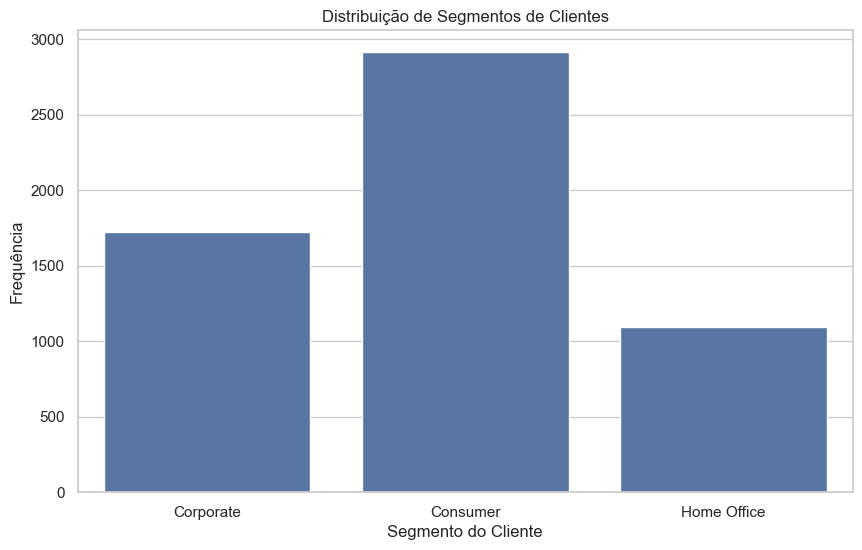

In [30]:
# Gráfico de barras para a distribuição de segmentos de clientes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='SEGMENTO_CLIENTE')
plt.title('Distribuição de Segmentos de Clientes')
plt.xlabel('Segmento do Cliente')
plt.ylabel('Frequência')
plt.show()

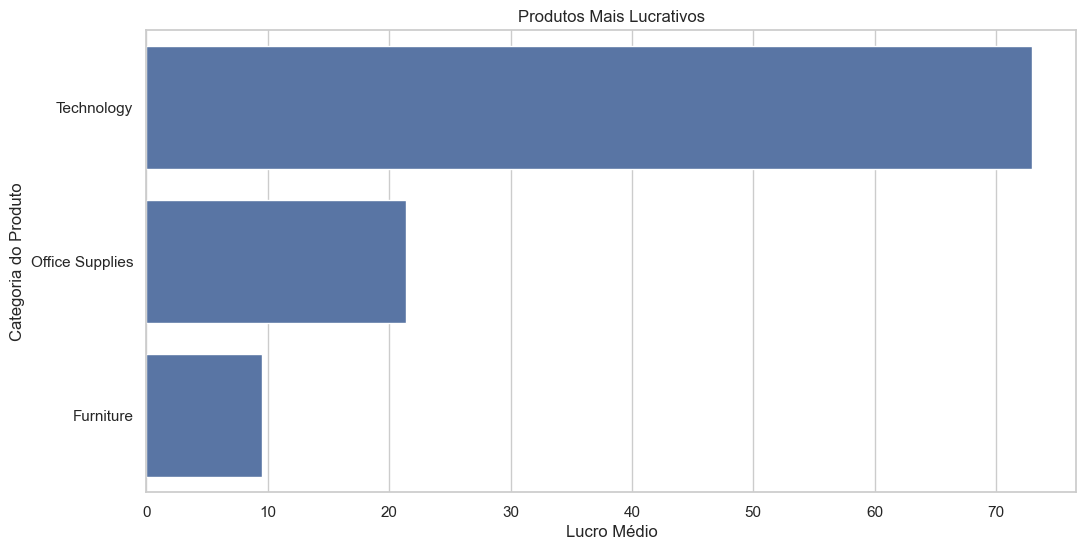

In [31]:
# Gráfico de barras para produtos mais lucrativos
plt.figure(figsize=(12, 6))
sns.barplot(data=lucro_categoria.head(10), x='LUCRO', y='CATEGORIA_PRODUTO')
plt.title('Produtos Mais Lucrativos')
plt.xlabel('Lucro Médio')
plt.ylabel('Categoria do Produto')
plt.show()

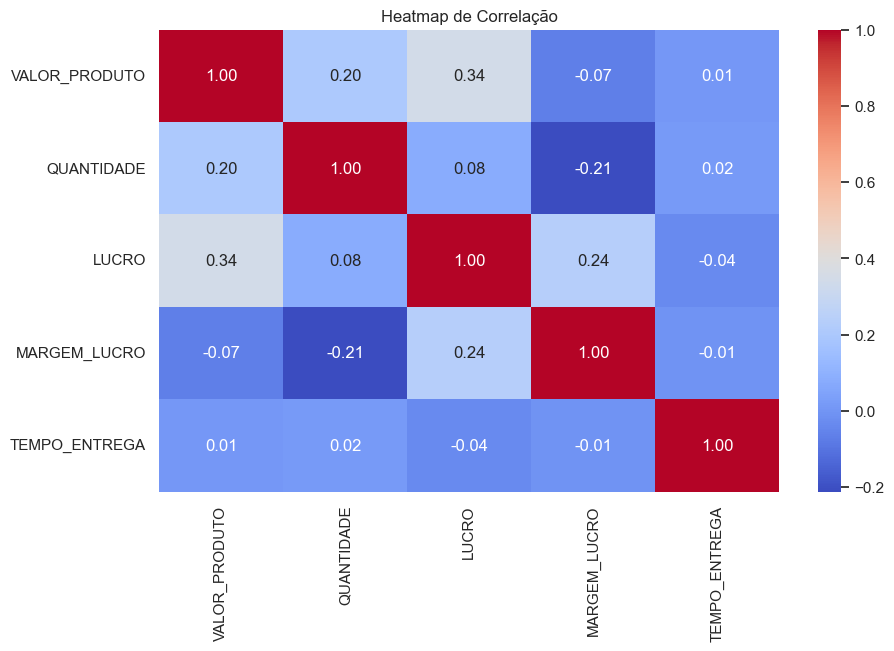

In [32]:
# Heatmap para correlação entre variáveis

df_clean = df_clean.drop(columns=['Unnamed: 0'], errors='ignore') # estava tendo problemas com a coluna 'Unnamed: 0'
corr_df = df_clean.select_dtypes(include='number') # apenas valores numéricos
correlation_matrix = corr_df.corr()

# Heatmap para correlação entre variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

#### **Fazendo uma análise do Heatmap de Correlação Entre Variáveis**


#### 1. **Correlação "Forte":**
- **Valor do Produto x Lucro (0.34):** Existe uma correlação positiva moderada entre o valor do produto e o lucro. Isso indica que produtos de maior valor tendem a gerar mais lucro, o que é esperado, já que itens mais caros costumam proporcionar uma margem maior de ganho.
  
- **Lucro x Margem de Lucro (0.24):** Existe uma correlação positiva também moderada entre lucro e margem de lucro. Isso significa que, em média, produtos com maior lucro também têm uma margem de lucro proporcionalmente mais alta.

#### 2. **Correlação Fraca:**
- **Quantidade x Valor do Produto (0.20):** A quantidade de unidades vendidas tem uma correlação leve com o valor do produto. Isso sugere que, em alguns casos, produtos de maior valor são vendidos em maior quantidade, mas essa relação não é muito forte.
  
- **Lucro x Tempo de Entrega (-0.04):** Curiosamente, há uma correlação negativa muito fraca entre lucro e tempo de entrega. Isso significa que o tempo de entrega praticamente não influencia os lucros, o que pode sugerir que os clientes não estão tão preocupados com o tempo de entrega em relação ao valor ou à quantidade dos produtos.

#### 3. **Correlação Insignificante:**
- **Margem de Lucro x Tempo de Entrega (-0.01):** Não há praticamente nenhuma correlação entre margem de lucro e tempo de entrega, sugerindo que os tempos de entrega mais longos ou mais curtos não afetam diretamente a margem de lucro dos produtos.
  
- **Quantidade x Lucro (0.08):** A correlação entre a quantidade de produtos vendidos e o lucro é muito baixa, indicando que vender uma grande quantidade de produtos não necessariamente resulta em grandes lucros. Isso pode ser explicado pelo fato de que nem todos os produtos vendidos em grande quantidade são os mais lucrativos.

### Conclusão
Com base nesta análise de correlação, podemos destacar algumas observações importantes para orientar decisões de negócios:

- **Produtos de maior valor tendem a gerar mais lucros**, mas também é importante considerar a margem de lucro para uma visão mais completa da lucratividade.
- **O tempo de entrega não tem um impacto significativo no lucro**, o que pode indicar que os clientes valorizam mais o produto em si do que a rapidez da entrega.
- A **quantidade de produtos vendidos não está fortemente relacionada com o lucro**, o que pode sugerir a necessidade de focar em produtos de maior valor ou margem de lucro ao invés de simplesmente aumentar as vendas em volume.

Análise das vendas ao longo do tempo:

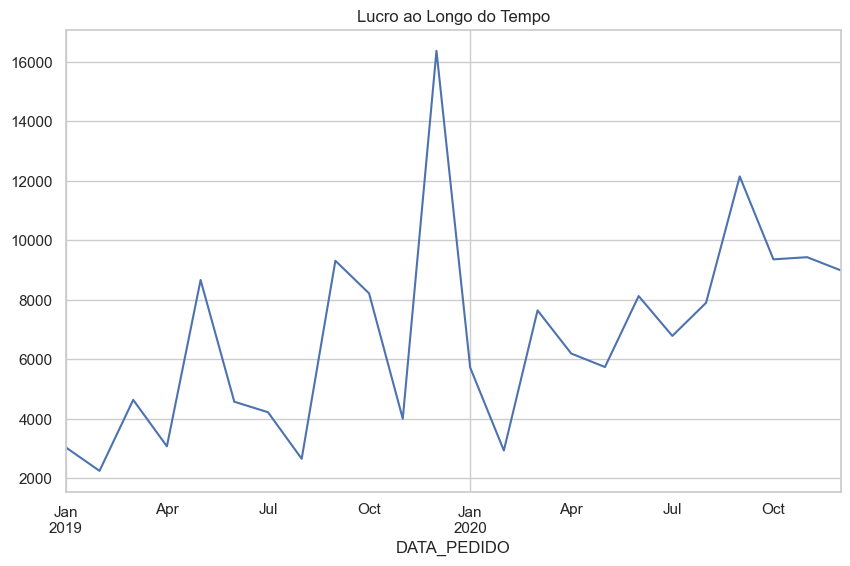

In [33]:
# Vendas ao longo do tempo
df.groupby(df_clean['DATA_PEDIDO'].dt.to_period('M'))['LUCRO'].sum().plot(kind='line', figsize=(10,6))
plt.title('Lucro ao Longo do Tempo')
plt.show()

Variações de lucro por categorias de produtos:


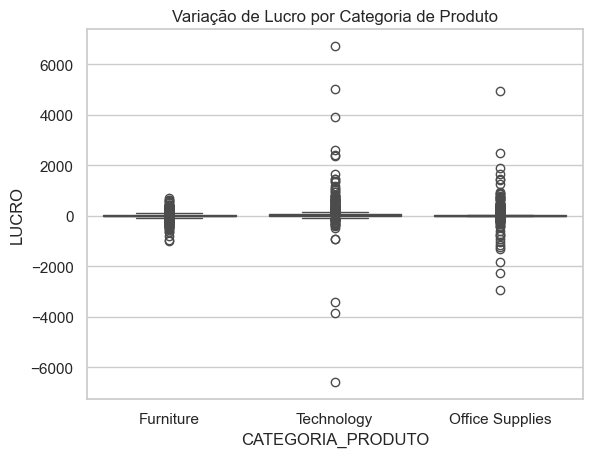

In [34]:
# Boxplot para lucro por categoria de produto
sns.boxplot(x='CATEGORIA_PRODUTO', y='LUCRO', data=df_clean)
plt.title('Variação de Lucro por Categoria de Produto')
plt.show()


## **Insights**

Essa análise apresenta os principais resultados extraídos dos dados de vendas, clientes, entregas e devoluções da empresa. O objetivo é fornecer insights valiosos para o time de negócios, facilitando a tomada de decisões estratégicas. Abaixo, organizamos as principais perguntas de negócios e suas respostas baseadas nas análises realizadas.

---

### 1. **Compreender o Perfil dos Clientes**

**Pergunta:** Quais são os segmentos de clientes mais frequentes (Corporate, Consumer, Home Office) e quais produtos eles compram mais?

**Resultado:**
- O segmento **Consumer** é o mais frequente com **2.948** clientes, seguido por **Corporate** (1.745) e **Home Office** (1.108).
- **Produtos mais comprados por segmento:**
  - **Consumer**: O maior número de vendas está na categoria **Office Supplies** com 1.777 vendas, seguida de **Furniture** (630) e **Technology** (507).
  - **Corporate**: Predomina também **Office Supplies** (1.025 vendas), seguido por **Furniture** (378) e **Technology** (319).
  - **Home Office**: Prioriza **Office Supplies** (658 vendas), seguido por **Technology** (221) e **Furniture** (213).

  

**Conclusão:** O segmento Consumer é o maior em volume de vendas e está mais concentrado em produtos de escritório. Já Corporate e Home Office também têm preferência por produtos de escritório, mas com menor proporção em tecnologia e mobiliário. 

**Ação sugerida:** Focar campanhas de marketing para o segmento **Consumer**, oferecendo pacotes promocionais de **Office Supplies** e explorar oportunidades de cross-sell para móveis e tecnologia.

---

### 2. **Avaliar o Desempenho das Vendas**

**Pergunta:** Quais categorias de produtos são mais lucrativas? Há variação de lucro por região ou por modo de pagamento?

**Resultado:**
- **Categorias mais lucrativas**:
  - **Technology** com lucro médio de **72,98** por venda.
  - **Office Supplies** com lucro médio de **21,36** por venda.
  - **Furniture** com lucro médio de **9,48** por venda.

- **Lucro por região**:
  - **West**: maior lucro bruto (**35,40**), seguido por **East** (**31,32**) e **South** (**24,70**).
  
- **Lucro por forma de pagamento**:
  - O método **COD (pagamento na entrega)** apresenta o maior lucro médio (**33,74**), seguido por **Online** (**24,71**) e **Cartões** (**23,67**).

**Conclusão:** A categoria **Technology** é a mais lucrativa, seguida de Office Supplies. Regiões como **West** e **East** lideram em termos de lucro, e o pagamento via **COD** tem maior impacto positivo no lucro.

**Ação sugerida:** Priorizar a venda de produtos de tecnologia nas regiões **West** e **East**. Oferecer incentivos para pagamentos via **COD**, como descontos ou frete grátis, já que esse método gera maior retorno financeiro.

---

### 3. **Quais subcategorias de produtos são mais vendidas?**

**Resultado:**
- **Principais subcategorias por vendas:**
  - **Binders** (Office Supplies) com 864 vendas.
  - **Paper** (Office Supplies) com 810 vendas.
  - **Furnishings** (Furniture) com 561 vendas.

**Conclusão:** Há um volume significativo de vendas concentrado em itens de escritório, como **Binders** e **Paper**, que sugerem uma grande demanda contínua de itens essenciais.

**Ação sugerida:** Garantir estoque contínuo e promoções em **Binders** e **Paper**, considerando sua alta rotatividade e importância para os clientes corporativos e home office.

---

### 4. **Analisar a Eficácia das Entregas e Pagamentos**

**Pergunta:** A forma de entrega ou o método de pagamento afeta o lucro ou o número de devoluções?

**Resultado:**
- **Forma de entrega e lucro:**
  - **First Class** gera o maior lucro médio (**31,77**), seguido de **Second Class** (**30,73**) e **Standard Class** (**26,98**).
  
- **Forma de entrega e devoluções**:
  - **Standard Class** tem o maior número de devoluções (152), enquanto **First Class** apresenta menos devoluções (64).

- **Método de pagamento e devoluções**:
  - **Online** tem o maior número de devoluções (**119**), seguido de **COD** (113) e **Cartões** (50).

**Conclusão:** Entregas via **First Class** têm melhor performance em termos de lucro e menos devoluções. O pagamento via **Online** tem maior taxa de devolução, sugerindo uma necessidade de revisão nas políticas de entrega ou comunicação com os clientes desse método.

**Ação sugerida:** Priorizar o uso de **First Class** nas entregas sempre que possível e revisar processos de **pagamento online** para reduzir as devoluções. Implementar um sistema de rastreamento para garantir transparência na entrega de pedidos online.

---

### 5. **Padrões de Devoluções**

**Pergunta:** Quais são os padrões de devoluções por categoria de produto ou região?

**Resultado:**
- **Devoluções por categoria**:
  - **Office Supplies** e **Furniture** têm as maiores taxas de devolução nas regiões **West** e **Central**.
  - **Technology** tem menos devoluções, especialmente na região **Central** (2 devoluções).

**Conclusão:** As regiões **West** e **Central** apresentam maior taxa de devoluções em **Office Supplies** e **Furniture**.

**Ação sugerida:** Revisar políticas de devolução e processos de qualidade nos produtos de escritório e móveis nessas regiões. Implementar medidas de pós-venda para reduzir devoluções, como comunicação clara sobre produtos, acompanhamento da entrega e garantia estendida.

---

### 6. **Tempo Médio de Entrega**

**Pergunta:** Qual o tempo médio de entrega?

**Resultado:** O tempo médio de entrega é de aproximadamente **3,69 dias**.

**Conclusão:** O tempo de entrega está dentro de uma janela aceitável, mas pode ser otimizado para garantir maior satisfação dos clientes, especialmente em entregas para clientes que utilizam **Same Day** ou **First Class**.

**Ação sugerida:** Continuar investindo em eficiência logística para manter e melhorar esse prazo. Oferecer mais opções de **Same Day** para clientes premium ou em áreas específicas.

---

### Conclusão Geral:

Os insights obtidos fornecem uma visão clara sobre o comportamento de compra, lucratividade e logística da empresa. Para otimizar ainda mais os resultados, recomendamos:
- Foco em produtos de **tecnologia** e **escritório** para maximizar o lucro.
- Priorizar métodos de entrega como **First Class**, que tem o melhor equilíbrio entre lucro e devoluções.
- Revisar estratégias para regiões com maior volume de devoluções e implementar ações proativas de qualidade e atendimento ao cliente.

Esses insights podem direcionar o time de negócios a otimizar processos e aumentar a satisfação do cliente, resultando em maior rentabilidade.